In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2022-09-13 14:25:47.432706: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-13 14:25:48.139777: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-13 14:25:48.139832: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-13 14:25:48.213895: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-13 14:25:49.907121: W tensorflow/stream_executor/platform/de

2.10.0


## Creating some data to view it

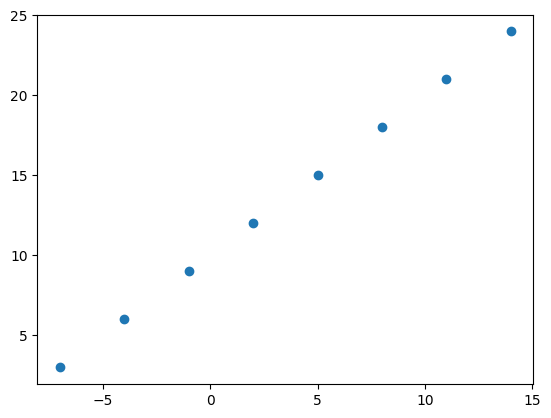

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y= np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

2022-09-13 14:25:52.891629: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-13 14:25:52.892071: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-13 14:25:52.892198: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-09-13 14:25:52.892301: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-09-13 14:25:52.892404: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

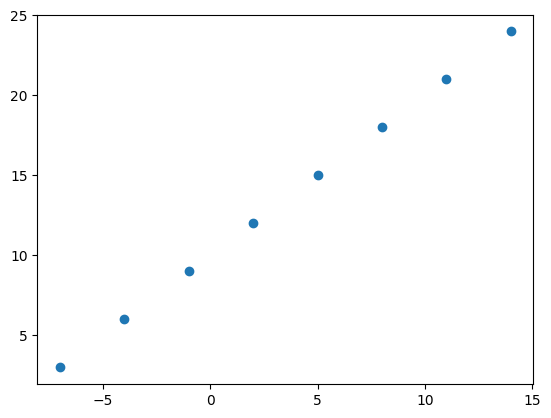

In [8]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns its leaning) and evaluating metrics(what we can use to interpret the performance of our model).
3. Fitting a model - letting the model to find patterns between X and y(features and labels).

In [9]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # mae is short for mean absolute error
 optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
metrics =['mae'])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 355ms/step - loss: 14.6359 - mae: 14.6359
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 14.5034 - mae: 14.5034
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 14.3709 - mae: 14.3709
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 14.2384 - mae: 14.2384
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 14.1059 - mae: 14.1059


In [10]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# Try and make a prediction using trained model
model.predict([17.0])

1/1 [==============================] - 0s 98ms/step


array([[-2.4920712]], dtype=float32)

## Improve our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - ere we might add more layers, increase the number of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might the optimization function or perhaps, the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [12]:
# Let`s rebuild our model
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
 optimizer=tf.keras.optimizers.SGD(),
metrics =['mae'])

# 3. Fit the model (this time we`ll train for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 266ms/step - loss: 16.3800 - mae: 16.3800
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 16.0987 - mae: 16.0987
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 15.8175 - mae: 15.8175
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 15.5362 - mae: 15.5362
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 15.2550 - mae: 15.2550
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 14.9737 - mae: 14.9737
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 14.7725 - mae: 14.7725
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 14.6400 - mae: 14.6400
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 14.5075 - mae: 14.5075
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 14.3750 - mae: 14.3750
Epoch 11/100
1/1 [==============================] - 0s 4m

In [13]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [14]:
# Let`s see if our model has improved
model.predict([17.0])

1/1 [==============================] - 0s 73ms/step


array([[29.603275]], dtype=float32)

In [15]:
# Let`s see if e can make another improvement

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics='mae')
# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 334ms/step - loss: 14.7202 - mae: 14.7202
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 14.2940 - mae: 14.2940
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 13.8745 - mae: 13.8745
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 13.4569 - mae: 13.4569
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 13.0413 - mae: 13.0413
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 12.6275 - mae: 12.6275
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 12.2613 - mae: 12.2613
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 11.9638 - mae: 11.9638
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 11.6667 - mae: 11.6667
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 11.3699 - mae: 11.3699
Epoch 11/100
1/1 [==============================] - 0s 5m

In [16]:
# Let`s remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Let`s try to take a prediction
model.predict([17.0])

1/1 [==============================] - 0s 73ms/step


array([[29.871107]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you`ll go through when building neural networks is



When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize"

It`s a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth(the original labels)?

In [18]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [19]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

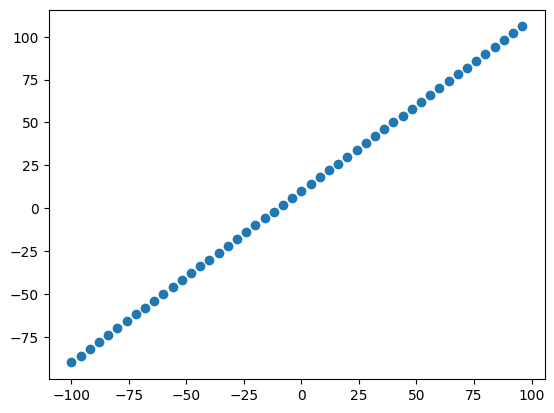

In [20]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80* of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available

In [21]:
# Check the length of how many samples we have
len(X)

50

In [22]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we`have got our data in training and test sets... let`s visualize it again

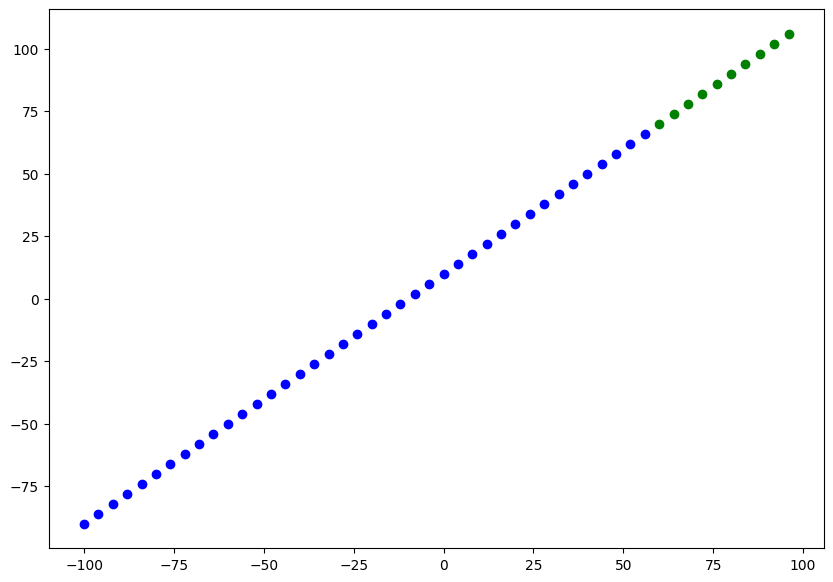

In [23]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot testing data is green
plt.scatter(X_test, y_test, c='g', label='Testing data')

In [24]:
# Let`s have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics='mae')


### Visualizing the model

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters the model can update as it trains
* Non-trainable params - these params aren`t updated during training ( this is typical when you bring in already learn patterns or parameters from other model during **transfer learning**).

In [26]:
# Let`s fit our model to the training data
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 23.6922 - mae: 23.6922
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 13.2434 - mae: 13.2434
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 19.3769 - mae: 19.3769
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 10.2027 - mae: 10.2027
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 12.3221 - mae: 12.3221
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 12.9491 - mae: 12.9491
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 10.0034 - mae: 10.0034
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 11.9432 - mae: 11.9432
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 12.6984 - mae: 12.6984
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.9943 - mae: 9.9943
Epoch 11/100
2/2 [==============================] - 0s 3ms/st

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


1/1 [==============================] - 0s 53ms/step


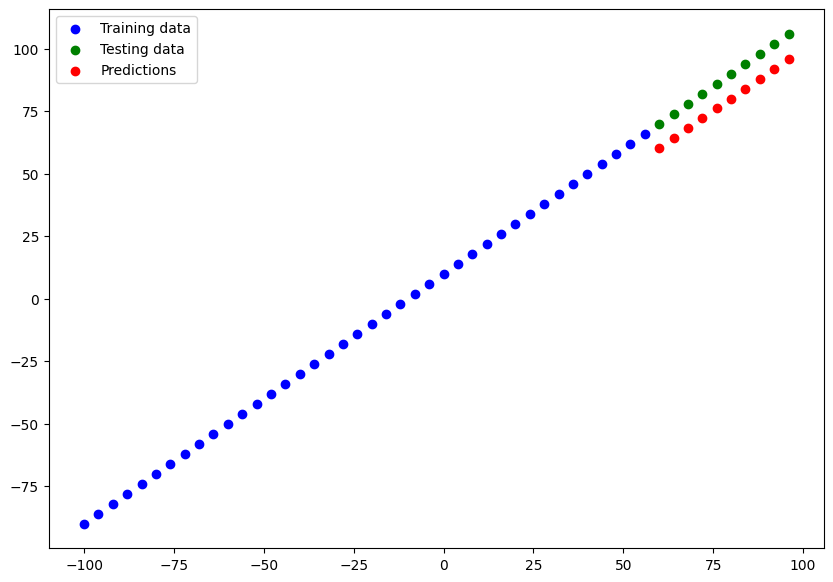

In [29]:
y_pred = model.predict(X_test)

def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    # Plot model`s prediction in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')
    # Show the legend
    plt.legend()

plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we`re working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's prediction"
* MSE - mead square root, "square the average errors"

In [30]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 117ms/step - loss: 9.8755 - mae: 9.8755


[9.875515937805176, 9.875515937805176]

In [31]:
# Calculate the MAE
tf.reduce_mean(tf.abs(tf.squeeze(tf.constant(y_pred)) - tf.cast(tf.constant(y_test), dtype=tf.float32))), tf.metrics.mean_absolute_error(tf.cast(tf.constant(y_test), dtype=tf.float32), tf.squeeze(tf.constant(y_pred)))
def mae(y_test, y_pred):
    return tf.metrics.mean_absolute_error(tf.cast(tf.constant(y_test), dtype=tf.float32), tf.squeeze(tf.constant(y_pred)))

In [32]:
# Calculate the mean square error
tf.metrics.mean_squared_error(tf.cast(tf.constant(y_test), dtype=tf.float32), tf.squeeze(tf.constant(y_pred)))

def mse(y_test, y_pred):
    return tf.metrics.mean_squared_error(tf.cast(tf.constant(y_test), dtype=tf.float32), tf.squeeze(tf.constant(y_pred)))

### Running experiments to improve our model

1. Get more data  - get more examples for your model to train on
2. Make your model larger (using more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs


In [33]:
### Build `model_1`


In [34]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 10.2716 - mae: 10.2716
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 8.1924 - mae: 8.1924
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 14.9682 - mae: 14.9682
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.1089 - mae: 8.1089
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 10.7121 - mae: 10.7121
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.9088 - mae: 9.9088
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.9698 - mae: 8.9698
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 9.0743 - mae: 9.0743
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 19.7586 - mae: 19.7586
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 10.6717 - mae: 10.6717
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - los

1/1 [==============================] - 0s 40ms/step


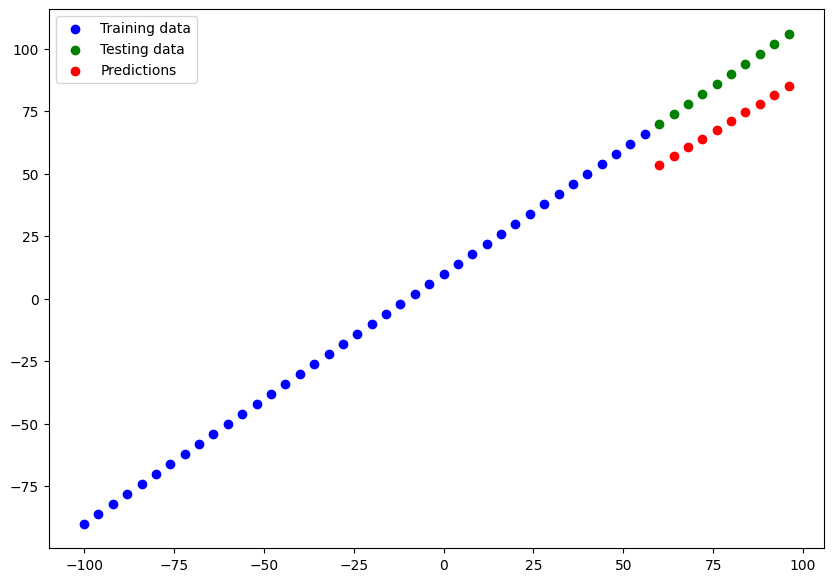

In [35]:
# Make and plot predictions for model_1
y_preds1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds1)

In [36]:
# Calculate model_1 evaluating metrics
mae_1 = mae(y_test, y_preds1)
mse_1 = mse(y_test, y_preds1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.687397>,
 <tf.Tensor: shape=(), dtype=float32, numpy=351.38788>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [37]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics='mse')

# 3. Fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 46.0869 - mse: 3087.6416
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 30.6195 - mse: 1229.1255
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 35.0530 - mse: 1870.9987
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 30.4067 - mse: 1370.6052
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 15.4917 - mse: 308.6440
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 12.2963 - mse: 189.7032
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.5881 - mse: 164.1679
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2533 - mse: 181.5793
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 42.3583 - mse: 2871.3767
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 29.5106 - mse: 1233.0300
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 56ms/step


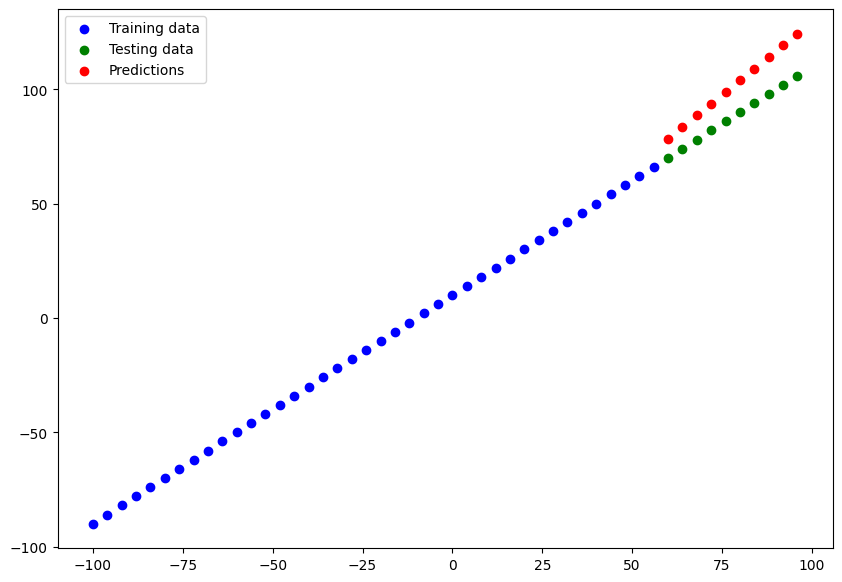

In [38]:
# Make predictions and plot them
y_preds2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds2)

In [45]:
# Calculate model_2 evaluating techniques
mae_2, mse_2 = mae(y_test, y_preds2), mse(y_test, y_preds2)

**`Build model_3`**

* 2 layers, trained for 500 epochs



In [40]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 21.6554 - mae: 21.6554
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 21.6474 - mae: 21.6474
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 27.9309 - mae: 27.9309
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 26.7082 - mae: 26.7082
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 14.6093 - mae: 14.6093
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 11.6302 - mae: 11.6302
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 10.9710 - mae: 10.9710
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 11.0034 - mae: 11.0034
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 39.4742 - mae: 39.4742
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 26.9958 - mae: 26.9958
Epoch 11/500
2/2 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 45ms/step


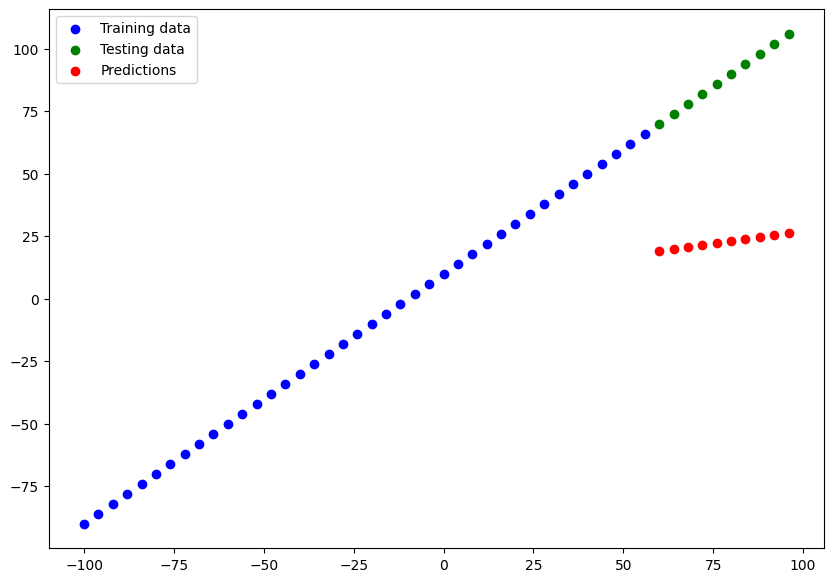

In [41]:
# Make and plot predictions
y_preds3 = model_3.predict(y_test)
plot_predictions(predictions=y_preds3)

In [44]:
# Calculate evaluation metrcis
mae_3, mse_3 = mae(y_test, y_preds3), mse(y_test, y_preds3)

## Comparing the results of our experimetns

We've run a few experiments, let's compare the results

In [54]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns =['model', 'mae', 'mse'])
all_results

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()